# Partial Least Square Regression

This notebook does the PLS Regression, to map the dances into a 2D plan, based on their emotions.

In [1]:
import c3d
import pandas as pd
import numpy as np
import os
import json
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Loading the data, getting the maximum length among the dances

In [2]:

max_length = 0

for filename in os.listdir('./Data/c3d'):
    if filename.endswith(".npy"):
        arr = np.load('./Data/c3d/'+filename)[1:]
        if np.shape(arr)[2] > max_length:
            max_length = np.shape(arr)[2]
        continue
    else:
        continue
print(max_length)

134830


In [3]:
total_array = np.empty((12*max_length))
labels = []

with open('./Data/emotions.json') as json_file:
    data = json.load(json_file)
    for filename, emotion in data.items():
        arr = np.load('./Data/c3d/'+filename)[1:]
        arr = np.resize(arr, (4,3,max_length))
        arr = arr.reshape((12 * max_length)) # Wrapping so that each dance is of the same (maximum) one
        total_array = np.vstack((total_array, arr))
        labels = labels + [emotion]


In [4]:
total_array = total_array[1:]
print(np.shape(total_array))
print(np.shape(labels))

(129, 1617960)
(129,)


Managing the emotion list, attributing each dance to its emotion

In [5]:
df_labels = pd.DataFrame(labels, columns=['emotion'])
list_emotions = list(df_labels.groupby('emotion').count().index)
emotions = [list_emotions.index(l) for l in labels]
emotions

[5,
 1,
 7,
 1,
 18,
 4,
 13,
 1,
 15,
 9,
 13,
 1,
 3,
 9,
 13,
 13,
 14,
 8,
 13,
 15,
 12,
 11,
 13,
 9,
 16,
 2,
 5,
 7,
 9,
 1,
 13,
 14,
 2,
 2,
 3,
 7,
 8,
 12,
 18,
 5,
 3,
 0,
 15,
 14,
 8,
 16,
 8,
 5,
 7,
 15,
 5,
 16,
 5,
 18,
 7,
 18,
 14,
 2,
 14,
 18,
 16,
 14,
 3,
 9,
 12,
 18,
 8,
 3,
 14,
 2,
 9,
 15,
 14,
 2,
 8,
 1,
 7,
 10,
 1,
 8,
 6,
 9,
 8,
 10,
 15,
 15,
 7,
 10,
 2,
 18,
 13,
 9,
 3,
 1,
 16,
 15,
 3,
 16,
 1,
 2,
 15,
 16,
 5,
 18,
 7,
 5,
 14,
 8,
 16,
 2,
 2,
 16,
 15,
 1,
 18,
 12,
 5,
 7,
 3,
 8,
 12,
 2,
 15,
 13,
 7,
 4,
 17,
 8,
 10]

In [6]:
list_emotions = ['miserable',
 'angry',
 'scary',
 'afraid',
 'nervous',
 'sad',
 'tired'
 'annoyed',
 'bored',
 'neutral',
 'mix',
 'ballet',
 'relaxed',
 'curiosity',
 'satisfied',
 'pleased',
 'active',
 'happy',
 'excited']

Performing the Partial Least Square Regression using the sklearn package

In [20]:
from sklearn.cross_decomposition import PLSRegression
y=emotions
n_comp=2 # On 2-D
pls_obj=PLSRegression(n_components=n_comp)
factorsPLS=pls_obj.fit_transform(total_array, y)[0]

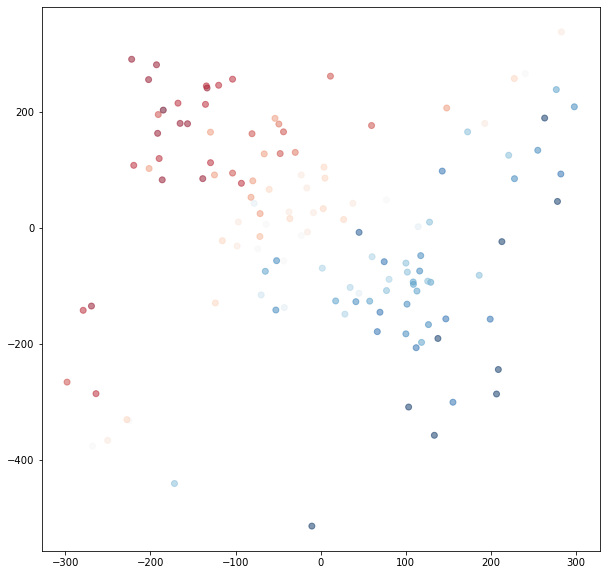

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(factorsPLS[:,0], factorsPLS[:,1], c=y, cmap='RdBu', alpha=0.5)